In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, SubsetRandomSampler, ConcatDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import pandas as pd
import math

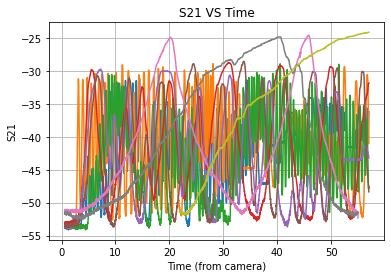

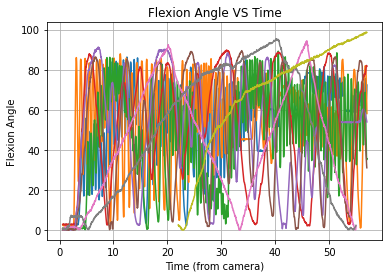

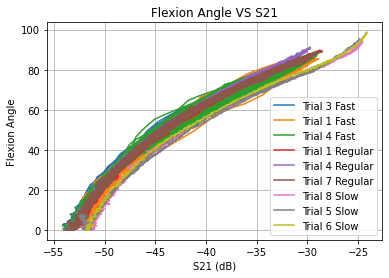

In [2]:
trial1RegularRawSweep = pd.read_csv('./data/planar10regular_1-sweep.csv')
trial1RegularRawAngle = pd.read_csv('./data/planar10regular_1-angles.csv')

trial4RegularRawSweep = pd.read_csv('./data/planar10regular_4-sweep.csv')
trial4RegularRawAngle = pd.read_csv('./data/planar10regular_4-angles.csv')

trial7RegularRawSweep = pd.read_csv('./data/planar10regular_7-sweep.csv')
trial7RegularRawAngle = pd.read_csv('./data/planar10regular_7-angles.csv')

trial6SlowRawSweep = pd.read_csv('./data/10cmplanarSlow6-sweep.csv')
trial6SlowRawAngle = pd.read_csv('./data/10cmplanarSlow6-angles.csv')

trial8SlowRawSweep = pd.read_csv('./data/10cmplanarSlow8-sweep.csv')
trial8SlowRawAngle = pd.read_csv('./data/10cmplanarSlow8-angles.csv')

trial5SlowRawSweep = pd.read_csv('./data/10cmplanarSlow5-sweep.csv')
trial5SlowRawAngle = pd.read_csv('./data/10cmplanarSlow5-angles.csv')

trial3FastRawSweep = pd.read_csv('./data/planar10fast_3-sweep.csv')
trial3FastRawAngle = pd.read_csv('./data/planar10fast_3-angles.csv')

trial4FastRawSweep = pd.read_csv('./data/planar10fast_4-sweep.csv')
trial4FastRawAngle = pd.read_csv('./data/planar10fast_4-angles.csv')

trial1FastRawSweep = pd.read_csv('./data/planar10fast_1-sweep.csv')
trial1FastRawAngle = pd.read_csv('./data/planar10fast_1-angles.csv')

timeS21trial3fast = trial3FastRawSweep['time'].to_numpy()
s21rawtrial3fast = trial3FastRawSweep['s21'].to_numpy()
timeCamtrial3fast = trial3FastRawAngle['time'].to_numpy()
angleCamtrial3fast = trial3FastRawAngle['angle_3d'].to_numpy()

timeS21trial4fast = trial4FastRawSweep['time'].to_numpy()
s21rawtrial4fast = trial4FastRawSweep['s21'].to_numpy()
timeCamtrial4fast = trial4FastRawAngle['time'].to_numpy()
angleCamtrial4fast = trial4FastRawAngle['angle_3d'].to_numpy()

timeS21trial1fast = trial1FastRawSweep['time'].to_numpy()
s21rawtrial1fast = trial1FastRawSweep['s21'].to_numpy()
timeCamtrial1fast = trial1FastRawAngle['time'].to_numpy()
angleCamtrial1fast = trial1FastRawAngle['angle_3d'].to_numpy()

timeS21trial7regular = trial7RegularRawSweep['time'].to_numpy()
s21rawtrial7regular = trial7RegularRawSweep['s21'].to_numpy()
timeCamtrial7regular = trial7RegularRawAngle['time'].to_numpy()
angleCamtrial7regular = trial7RegularRawAngle['angle_3d'].to_numpy()

timeS21trial4regular = trial4RegularRawSweep['time'].to_numpy()
s21rawtrial4regular = trial4RegularRawSweep['s21'].to_numpy()
timeCamtrial4regular = trial4RegularRawAngle['time'].to_numpy()
angleCamtrial4regular = trial4RegularRawAngle['angle_3d'].to_numpy()

timeS21trial6Slow = trial6SlowRawSweep['time'].to_numpy()
s21rawtrial6Slow = trial6SlowRawSweep['s21'].to_numpy()
timeCamtrial6Slow = trial6SlowRawAngle['time'].to_numpy()
angleCamtrial6Slow = trial6SlowRawAngle['angle_3d'].to_numpy()

timeS21trial8Slow = trial8SlowRawSweep['time'].to_numpy()
s21rawtrial8Slow = trial8SlowRawSweep['s21'].to_numpy()
timeCamtrial8Slow = trial8SlowRawAngle['time'].to_numpy()
angleCamtrial8Slow = trial8SlowRawAngle['angle_3d'].to_numpy()

timeS21trial5Slow = trial5SlowRawSweep['time'].to_numpy()
s21rawtrial5Slow = trial5SlowRawSweep['s21'].to_numpy()
timeCamtrial5Slow = trial5SlowRawAngle['time'].to_numpy()
angleCamtrial5Slow = trial5SlowRawAngle['angle_3d'].to_numpy()

timeS21trial1regular = trial1RegularRawSweep['time'].to_numpy()
s21rawtrial1regular = trial1RegularRawSweep['s21'].to_numpy()
timeCamtrial1regular = trial1RegularRawAngle['time'].to_numpy()
angleCamtrial1regular = trial1RegularRawAngle['angle_3d'].to_numpy()


timeS21trial3fast = np.linspace(timeS21trial3fast[0] + .03333333333, timeS21trial3fast[-1] + .03333333333, len(timeS21trial3fast), endpoint=True)
timeS21trial4fast = np.linspace(timeS21trial4fast[0] + .03333333333, timeS21trial4fast[-1] + .03333333333, len(timeS21trial4fast), endpoint=True)
timeS21trial1fast = np.linspace(timeS21trial1fast[0] + .03333333333, timeS21trial1fast[-1] + .03333333333, len(timeS21trial1fast), endpoint=True)
timeS21trial7regular = np.linspace(timeS21trial7regular[0] + .03333333333, timeS21trial7regular[-1] + .03333333333, len(timeS21trial7regular), endpoint=True)
timeS21trial4regular = np.linspace(timeS21trial4regular[0] + .03333333333, timeS21trial4regular[-1] + .03333333333, len(timeS21trial4regular), endpoint=True)
timeS21trial1regular = np.linspace(timeS21trial1regular[0] + .03333333333, timeS21trial1regular[-1] + .03333333333, len(timeS21trial1regular), endpoint=True)
timeS21trial5Slow = np.linspace(timeS21trial5Slow[0] + .03333333333, timeS21trial5Slow[-1] + .03333333333, len(timeS21trial5Slow), endpoint=True)
timeS21trial6Slow = np.linspace(timeS21trial6Slow[0] + .03333333333, timeS21trial6Slow[-1] + .03333333333, len(timeS21trial6Slow), endpoint=True)
timeS21trial8Slow = np.linspace(timeS21trial8Slow[0] + .03333333333, timeS21trial8Slow[-1] + .03333333333, len(timeS21trial8Slow), endpoint=True)


interp_calibration_angle_trial1regular = np.interp(timeS21trial1regular, timeCamtrial1regular, angleCamtrial1regular)
interp_calibration_angle_trial4regular = np.interp(timeS21trial4regular, timeCamtrial4regular, angleCamtrial4regular)
interp_calibration_angle_trial7regular = np.interp(timeS21trial7regular, timeCamtrial7regular, angleCamtrial7regular)
interp_calibration_angle_trial8Slow = np.interp(timeS21trial8Slow, timeCamtrial8Slow, angleCamtrial8Slow)
interp_calibration_angle_trial5Slow = np.interp(timeS21trial5Slow, timeCamtrial5Slow, angleCamtrial5Slow)
interp_calibration_angle_trial6Slow = np.interp(timeS21trial6Slow, timeCamtrial6Slow, angleCamtrial6Slow)
interp_calibration_angle_trial3Fast = np.interp(timeS21trial3fast, timeCamtrial3fast, angleCamtrial3fast)
interp_calibration_angle_trial1Fast = np.interp(timeS21trial1fast, timeCamtrial1fast, angleCamtrial1fast)
interp_calibration_angle_trial4Fast = np.interp(timeS21trial4fast, timeCamtrial4fast, angleCamtrial4fast)

trial1regular = pd.DataFrame(columns = ['Time', 'S21', 'Angle'])
trial1regular['Time'] = timeS21trial1regular
trial1regular['S21'] = s21rawtrial1regular
trial1regular['Angle'] = interp_calibration_angle_trial1regular

trial4regular = pd.DataFrame(columns = ['Time', 'S21', 'Angle'])
trial4regular['Time'] = timeS21trial4regular
trial4regular['S21'] = s21rawtrial4regular
trial4regular['Angle'] = interp_calibration_angle_trial4regular

trial7regular = pd.DataFrame(columns = ['Time', 'S21', 'Angle'])
trial7regular['Time'] = timeS21trial7regular
trial7regular['S21'] = s21rawtrial7regular
trial7regular['Angle'] = interp_calibration_angle_trial7regular

trial8Slow = pd.DataFrame(columns = ['Time', 'S21', 'Angle'])
trial8Slow['Time'] = timeS21trial8Slow
trial8Slow['S21'] = s21rawtrial8Slow
trial8Slow['Angle'] = interp_calibration_angle_trial8Slow

trial5Slow = pd.DataFrame(columns = ['Time', 'S21', 'Angle'])
trial5Slow['Time'] = timeS21trial5Slow
trial5Slow['S21'] = s21rawtrial5Slow
trial5Slow['Angle'] = interp_calibration_angle_trial5Slow

trial6Slow = pd.DataFrame(columns = ['Time', 'S21', 'Angle'])
trial6Slow['Time'] = timeS21trial6Slow
trial6Slow['S21'] = s21rawtrial6Slow
trial6Slow['Angle'] = interp_calibration_angle_trial6Slow

trial3Fast = pd.DataFrame(columns = ['Time', 'S21', 'Angle'])
trial3Fast['Time'] = timeS21trial3fast
trial3Fast['S21'] = s21rawtrial3fast
trial3Fast['Angle'] = interp_calibration_angle_trial3Fast

trial1Fast = pd.DataFrame(columns = ['Time', 'S21', 'Angle'])
trial1Fast['Time'] = timeS21trial1fast
trial1Fast['S21'] = s21rawtrial1fast
trial1Fast['Angle'] = interp_calibration_angle_trial1Fast

trial4Fast = pd.DataFrame(columns = ['Time', 'S21', 'Angle'])
trial4Fast['Time'] = timeS21trial4fast
trial4Fast['S21'] = s21rawtrial4fast
trial4Fast['Angle'] = interp_calibration_angle_trial4Fast

trial7regular = trial7regular[trial7regular.Time < 57]
trial4regular = trial4regular[trial4regular.Time < 57]
trial8Slow = trial8Slow[trial8Slow.Time < 55]
trial5Slow = trial5Slow[trial5Slow.Time < 55]
trial1regular = trial1regular[trial1regular.Time < 57]

trial6Slow = trial6Slow[trial6Slow.Time < 57]
trial6Slow = trial6Slow[trial6Slow.Time > 22]

trial3Fast = trial3Fast[trial3Fast.Time < 57]
trial1Fast = trial1Fast[trial1Fast.Time < 57]
trial4Fast = trial4Fast[trial4Fast.Time < 57]


trialBank1 = [trial7regular, trial1regular, trial4regular, trial8Slow, trial5Slow, trial6Slow, trial3Fast, trial1Fast, trial4Fast]  


plt.plot(trial3Fast['Time'], trial3Fast['S21'], label = 'Trial 3 Fast')
plt.plot(trial1Fast['Time'], trial1Fast['S21'], label = 'Trial 1 Fast')
plt.plot(trial4Fast['Time'], trial4Fast['S21'], label = 'Trial 4 Fast')
plt.plot(trial1regular['Time'], trial1regular['S21'], label = 'Trial 1 Regular')
plt.plot(trial4regular['Time'], trial4regular['S21'], label = 'Trial 4 Regular')
plt.plot(trial7regular['Time'], trial7regular['S21'], label = 'Trial 7 Regular')
plt.plot(trial8Slow['Time'], trial8Slow['S21'], label = 'Trial 8 Slow')
plt.plot(trial5Slow['Time'], trial5Slow['S21'], label = 'Trial 5 Slow')
plt.plot(trial6Slow['Time'], trial6Slow['S21'], label = 'Trial 6 Slow')
plt.grid()
plt.xlabel('Time (from camera)')
plt.ylabel('S21')
plt.title('S21 VS Time')
plt.show()

plt.plot(trial3Fast['Time'], trial3Fast['Angle'], label = 'Trial 3 Fast')
plt.plot(trial1Fast['Time'], trial1Fast['Angle'], label = 'Trial 1 Fast')
plt.plot(trial4Fast['Time'], trial4Fast['Angle'], label = 'Trial 4 Fast')
plt.plot(trial1regular['Time'], trial1regular['Angle'], label = 'Trial 1 Regular')
plt.plot(trial4regular['Time'], trial4regular['Angle'], label = 'Trial 4 Regular')
plt.plot(trial7regular['Time'], trial7regular['Angle'], label = 'Trial 7 Regular')
plt.plot(trial8Slow['Time'], trial8Slow['Angle'], label = 'Trial 8 Slow')
plt.plot(trial5Slow['Time'], trial5Slow['Angle'], label = 'Trial 5 Slow')
plt.plot(trial6Slow['Time'], trial6Slow['Angle'], label = 'Trial 6 Slow')
plt.grid()

plt.xlabel('Time (from camera)')
plt.ylabel('Flexion Angle')
plt.title('Flexion Angle VS Time')
plt.show()
plt.plot(trial3Fast['S21'], trial3Fast['Angle'], label = 'Trial 3 Fast')
plt.plot(trial1Fast['S21'], trial1Fast['Angle'], label = 'Trial 1 Fast')
plt.plot(trial4Fast['S21'], trial4Fast['Angle'], label = 'Trial 4 Fast')
plt.plot(trial1regular['S21'], trial1regular['Angle'], label = 'Trial 1 Regular')
plt.plot(trial4regular['S21'], trial4regular['Angle'], label = 'Trial 4 Regular')
plt.plot(trial7regular['S21'], trial7regular['Angle'], label = 'Trial 7 Regular')
plt.plot(trial8Slow['S21'], trial8Slow['Angle'], label = 'Trial 8 Slow')
plt.plot(trial5Slow['S21'], trial5Slow['Angle'], label = 'Trial 5 Slow')
plt.plot(trial6Slow['S21'], trial6Slow['Angle'], label = 'Trial 6 Slow')
plt.grid()
plt.legend()
plt.xlabel('S21 (dB)')
plt.ylabel('Flexion Angle')
plt.title('Flexion Angle VS S21')
plt.show()

In [262]:
# Now we average the data for the purpose of smoothing vectors to achieve higher accuracy
# We separate elements into vectors of length 4

slowVector = set()
regularVector = set()
fastVector = set()

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

VECTOR_LENGTH = 4
AVERAGE_LENGTH = 75

timeMatrix = []
s21Matrix = []
angleMatrix = []

setTimes = []
sets21 = []
setangle = []

for index, bank in enumerate(trialBank1):
    setTimes.append([])
    sets21.append([])
    setangle.append([])

    timeVector = []
    s21Vector = []
    angleVector = []
    vectorcount = 0
    s21 = moving_average(bank['S21'].to_numpy(), AVERAGE_LENGTH)
    angle = moving_average(bank['Angle'].to_numpy(), AVERAGE_LENGTH)
    s21 = np.float32(s21)
    angle = np.float32(angle)
    

    while vectorcount + VECTOR_LENGTH - 1 < len(s21):
        for i in range(VECTOR_LENGTH):
            s21Vector.append(s21[vectorcount])

            angleVector.append(angle[vectorcount])

            vectorcount += 1

        s21Matrix.append(np.array(s21Vector))
        s21Vector = []
        angleMatrix.append(np.array(angleVector))

        print(np.array(angleVector))
        print(type(np.array(angleVector)))
        
        if index < 3:
            regularVector.add(tuple(np.array(angleVector)))
        elif index < 6:
            slowVector.add(tuple(np.array(angleVector)))
        else:
            fastVector.add(tuple(np.array(angleVector)))
        angleVector = []


[0.21230905 0.21748127 0.22251129 0.2267249 ]
<class 'numpy.ndarray'>
[0.22470726 0.22677684 0.2324798  0.23660289]
<class 'numpy.ndarray'>
[0.2395345  0.24024905 0.24018742 0.24000561]
<class 'numpy.ndarray'>
[0.23982543 0.23965697 0.23769636 0.24004897]
<class 'numpy.ndarray'>
[0.24219196 0.24216631 0.23759528 0.23442103]
<class 'numpy.ndarray'>
[0.23293746 0.23467086 0.24047613 0.24445964]
<class 'numpy.ndarray'>
[0.24671425 0.24940746 0.25133708 0.25265127]
<class 'numpy.ndarray'>
[0.25296077 0.25187886 0.2526911  0.25351438]
<class 'numpy.ndarray'>
[0.25200063 0.24967586 0.24685754 0.24389452]
<class 'numpy.ndarray'>
[0.24310951 0.24354747 0.24231826 0.23986924]
<class 'numpy.ndarray'>
[0.2362998  0.23330928 0.23172389 0.23002921]
<class 'numpy.ndarray'>
[0.22847897 0.2281998  0.23008543 0.23304518]
<class 'numpy.ndarray'>
[0.23285443 0.23280223 0.23390174 0.23737122]
<class 'numpy.ndarray'>
[0.23785314 0.23459582 0.23262876 0.23483007]
<class 'numpy.ndarray'>
[0.24072511 0.248365

In [263]:
class SleevelessData(torch.utils.data.Dataset):

    def __init__(self, x, y):
        self.x = torch.as_tensor(x, dtype = torch.float32)
        self.y = torch.as_tensor(y, dtype = torch.float32)
    def __len__(self):
        return len(self.x)
    def __getitem__(self, i):
        return self.x[i], self.y[i]
    

class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.layers = nn.Sequential(nn.Linear(VECTOR_LENGTH, 1500), nn.ReLU(), nn.Linear(1500, 1500), nn.ReLU(), nn.Linear(1500, 1500), nn.ReLU(), nn.Linear(1500, VECTOR_LENGTH))   #   
    def forward(self, x):
        return self.layers(x)


In [265]:
from sklearn.model_selection import KFold

num_epochs = 100
batch_size = 5
loss_function = nn.MSELoss()

splits = KFold(n_splits = 10, shuffle = True, random_state = 42)

results = {}
slowResults = {}
regularResults = {}
fastResults = {}


In [266]:
x = s21Matrix
y = angleMatrix

xTrain, xTest, yTrain, yTest = train_test_split(s21Matrix, angleMatrix, test_size = 0.25, random_state = 42)
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

train_dataset =  SleevelessData(xTrain, yTrain)
test_dataset =  SleevelessData(xTest, yTest)

dataset = ConcatDataset([train_dataset, test_dataset])

In [267]:
print('--------------------------------')


for fold, (train_idx, test_idx) in enumerate(splits.split(dataset)):

    print('Fold {}'.format(fold + 1))
    print('--------------------------------')
    
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)

    train_loader = DataLoader(dataset, batch_size = batch_size, sampler = train_sampler)
    test_loader = DataLoader(dataset, batch_size = batch_size, sampler = test_sampler)

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

    network = Network()
    network.to(device)
    optimizer = torch.optim.Adam(network.parameters(), lr = .001)

    for epoch in range(num_epochs):
        print(f'Starting epoch {epoch + 1}')
        current_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, targets = data
            optimizer.zero_grad()
            outputs = network(inputs)
            loss = loss_function(outputs, targets)
            loss.backward()
            optimizer.step()
            current_loss += loss.item()
            if i % 100 == 99:
                print('Loss after mini batch %5d: %.3f' % (epoch + 1, current_loss / 100))
                current_loss = 0.0
    
    print('Training Complete')
    print('Starting Testing')

    with torch.no_grad():

        predictions, actuals = list(), list()
        meanObserved = 0
        numObserved = 0

        fast = dict()
        regular = dict()
        slow = dict()

        fast['predictions'] = list()
        fast['actuals'] = list()
        fast['meanObserved'] = 0
        fast['numObserved'] = 0

        regular['predictions'] = list()
        regular['actuals'] = list()
        regular['meanObserved'] = 0
        regular['numObserved'] = 0

        slow['predictions'] = list()
        slow['actuals'] = list()
        slow['meanObserved'] = 0
        slow['numObserved'] = 0

        
        for index, data in enumerate(test_loader, 0):
            inputs, targets = data
            output = network(inputs)
        
            output = output.detach().numpy()
            actual = targets.numpy()

            predictions.append(output)
            actuals.append(actual)

            for i in range(len(actual)):

                if tuple(np.array(actual[i])) in regularVector:
                    regular['predictions'].append(output[i])
                    regular['actuals'].append(actual[i])
                    for scalar in actual[i]:
                        meanObserved += scalar
                        numObserved += 1
                        regular['meanObserved'] += scalar
                        regular['numObserved'] += 1
                elif tuple(np.array(actual[i])) in slowVector:
                    slow['predictions'].append(output[i])
                    slow['actuals'].append(actual[i])
                    for scalar in actual[i]:
                        meanObserved += scalar
                        numObserved += 1
                        slow['meanObserved'] += scalar
                        slow['numObserved'] += 1
                else:
                    fast['predictions'].append(output[i])
                    fast['actuals'].append(actual[i])
                    for scalar in actual[i]:
                        meanObserved += scalar
                        numObserved += 1
                        fast['meanObserved'] += scalar
                        fast['numObserved'] += 1
                
    meanObserved /= numObserved
    fast['meanObserved'] /= fast['numObserved']
    slow['meanObserved'] /= slow['numObserved']
    regular['meanObserved'] /= regular['numObserved']


    
    predictions, actuals = np.array(predictions, dtype = object), np.array(actuals, dtype = object)
    fast['predictions'], fast['actuals'] = np.array(fast['predictions']), np.array(fast['actuals'])
    slow['predictions'], slow['actuals'] = np.array(slow['predictions']), np.array(slow['actuals'])
    regular['predictions'], regular['actuals'] = np.array(regular['predictions']), np.array(regular['actuals'])


    predictions, actuals = np.vstack(predictions), np.vstack(actuals)
    fast['predictions'], fast['actuals'] = np.vstack(fast['predictions']), np.vstack(fast['actuals'])
    slow['predictions'], slow['actuals'] = np.vstack(slow['predictions']), np.vstack(slow['actuals'])
    regular['predictions'], regular['actuals'] = np.vstack(regular['predictions']), np.vstack(regular['actuals'])

    mseRealAngle = mean_squared_error(actuals, predictions)
    fastMSERealAngle = mean_squared_error(fast['actuals'], fast['predictions'])
    regularMSERealAngle = mean_squared_error(regular['actuals'], regular['predictions'])
    slowMSERealAngle = mean_squared_error(slow['actuals'], slow['predictions'])



    predictions, actuals = np.ndarray.flatten(predictions), np.ndarray.flatten(actuals)
    fast['predictions'], fast['actuals'] = np.ndarray.flatten(fast['predictions']), np.ndarray.flatten(fast['actuals'])
    slow['predictions'], slow['actuals'] = np.ndarray.flatten(slow['predictions']), np.ndarray.flatten(slow['actuals'])
    regular['predictions'], regular['actuals'] = np.ndarray.flatten(regular['predictions']), np.ndarray.flatten(regular['actuals'])



    r = np.corrcoef(predictions, actuals)[0][1]
    rFast = np.corrcoef(fast['predictions'], fast['actuals'])[0][1]
    rRegular = np.corrcoef(regular['predictions'], regular['actuals'])[0][1]
    rSlow = np.corrcoef(slow['predictions'], slow['actuals'])[0][1]

    print(f'RMSE for fold {fold + 1}: {math.sqrt(mseRealAngle)}')
    print(f'rRMSE for fold {fold + 1}: {math.sqrt(mseRealAngle) / meanObserved}')
    print(f'r for fold {fold + 1}: {r}')

    fastMeanObserved = fast['meanObserved']
    print(f'Fast RMSE for fold {fold + 1}: {math.sqrt(fastMSERealAngle)}')
    print(f'Fast rRMSE for fold {fold + 1}: {math.sqrt(fastMSERealAngle) / fastMeanObserved}')
    print(f'Fast r for fold {fold + 1}: {rFast}')

    slowMeanObserved = slow['meanObserved']
    print(f'Slow RMSE for fold {fold + 1}: {math.sqrt(slowMSERealAngle)}')
    print(f'Slow rRMSE for fold {fold + 1}: {math.sqrt(slowMSERealAngle) / slowMeanObserved}')
    print(f'Slow r for fold {fold + 1}: {rSlow}')

    regularMeanObserved = regular['meanObserved']
    print(f'Regular RMSE for fold {fold + 1}: {math.sqrt(regularMSERealAngle)}')
    print(f'Regular rRMSE for fold {fold + 1}: {math.sqrt(regularMSERealAngle) / regularMeanObserved}')
    print(f'Regular r for fold {fold + 1}: {rRegular}')
    
    results[fold] = (math.sqrt(mseRealAngle), math.sqrt(mseRealAngle) / meanObserved, r)
    regularResults[fold] = (math.sqrt(regularMSERealAngle), math.sqrt(regularMSERealAngle) / regularMeanObserved, rRegular)
    slowResults[fold] = (math.sqrt(slowMSERealAngle), math.sqrt(slowMSERealAngle) / slowMeanObserved, rSlow)
    fastResults[fold] = (math.sqrt(fastMSERealAngle), math.sqrt(fastMSERealAngle) / fastMeanObserved, rFast)

print('K-Fold Cross Validation Results for 10 FOLDS')
print('--------------------------------')
sum = 0.0
scoreArr = []
for key, value in results.items():
    print(f'Fold {key}: {value[0]}')
    sum += value[0]
    scoreArr.append(value[0])
print(f'Average: {sum / len(scoreArr)}')
print(f'Standard Deviation: {np.std(scoreArr)}')


--------------------------------
Fold 1
--------------------------------
Starting epoch 1
Loss after mini batch     1: 292.173
Loss after mini batch     1: 16.599
Loss after mini batch     1: 19.456
Loss after mini batch     1: 36.300
Loss after mini batch     1: 21.789
Loss after mini batch     1: 28.344
Loss after mini batch     1: 21.304
Loss after mini batch     1: 22.096
Loss after mini batch     1: 28.093
Loss after mini batch     1: 36.402
Loss after mini batch     1: 18.848
Starting epoch 2
Loss after mini batch     2: 22.020
Loss after mini batch     2: 19.167
Loss after mini batch     2: 24.175
Loss after mini batch     2: 19.521
Loss after mini batch     2: 21.070
Loss after mini batch     2: 18.073
Loss after mini batch     2: 21.600
Loss after mini batch     2: 19.328
Loss after mini batch     2: 18.300
Loss after mini batch     2: 23.084
Loss after mini batch     2: 26.712
Starting epoch 3
Loss after mini batch     3: 15.977
Loss after mini batch     3: 16.145
Loss after 

In [285]:
results

rmseAll = [element[1][0] for element in results.items()]
rrmseAll = [element[1][1] for element in results.items()]
rAll = [element[1][2] for element in results.items()]

print('Mean RMSE: ', np.mean(rmseAll) , '+-', np.std(rmseAll))
print('Mean rRMSE: ', np.mean(rrmseAll) , '+-', np.std(rrmseAll))
print('Mean r: ', np.mean(rAll) , '+-', np.std(rAll))

Mean RMSE:  3.4930713065320234 +- 0.10594282289701228
Mean rRMSE:  0.0681072477482915 +- 0.001952770870385403
Mean r:  0.9903408284001302 +- 0.00038371178555326427


In [286]:
regularResults

rmseRegular = [element[1][0] for element in regularResults.items()]
rrmseRegular = [element[1][1] for element in regularResults.items()]
rRegular = [element[1][2] for element in regularResults.items()]

print('Mean RMSE: ', np.mean(rmseRegular) , '+-', np.std(rmseRegular))
print('Mean rRMSE: ', np.mean(rrmseRegular) , '+-', np.std(rrmseRegular))
print('Mean r: ', np.mean(rRegular) , '+-', np.std(rRegular))

Mean RMSE:  2.611506437540097 +- 0.40575624176574054
Mean rRMSE:  0.051843385221528225 +- 0.00834382539283731
Mean r:  0.996798470050431 +- 0.0004774547209944931


In [287]:
slowResults

rmseSlow = [element[1][0] for element in slowResults.items()]
rrmseSlow = [element[1][1] for element in slowResults.items()]
rSlow = [element[1][2] for element in slowResults.items()]

print('Mean RMSE: ', np.mean(rmseSlow) , '+-', np.std(rmseSlow))
print('Mean rRMSE: ', np.mean(rrmseSlow) , '+-', np.std(rrmseSlow))
print('Mean r: ', np.mean(rSlow) , '+-', np.std(rSlow))

Mean RMSE:  4.5632028199285175 +- 0.4103402687220703
Mean rRMSE:  0.08704333606729006 +- 0.007835388415749437
Mean r:  0.9979441342200109 +- 0.0002469458517429239


In [288]:
fastResults

rmseFast = [element[1][0] for element in fastResults.items()]
rrmseFast = [element[1][1] for element in fastResults.items()]
rFast = [element[1][2] for element in fastResults.items()]

print('Mean RMSE: ', np.mean(rmseFast) , '+-', np.std(rmseFast))
print('Mean rRMSE: ', np.mean(rrmseFast) , '+-', np.std(rrmseFast))
print('Mean r: ', np.mean(rFast) , '+-', np.std(rFast))

Mean RMSE:  3.1597620589283704 +- 0.1824326717387349
Mean rRMSE:  0.06188097884413161 +- 0.003747189730778715
Mean r:  0.9836832856471212 +- 0.0026315530871670514
